In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.Category =  df.Category.map({'ham': 0, 'spam':1})

In [4]:
X = df.Message
y = df.Category

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=74)

In [6]:
model = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english')),
    ('clf',LogisticRegression(solver='liblinear'))
])

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(solver='liblinear'))])

In [8]:
y_pred = model.predict(X_test)

In [9]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('\nClassification report:',classification_report(y_test, y_pred))

Accuracy: 0.95695067264574

Classification report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       967
           1       0.98      0.69      0.81       148

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



<Axes: >

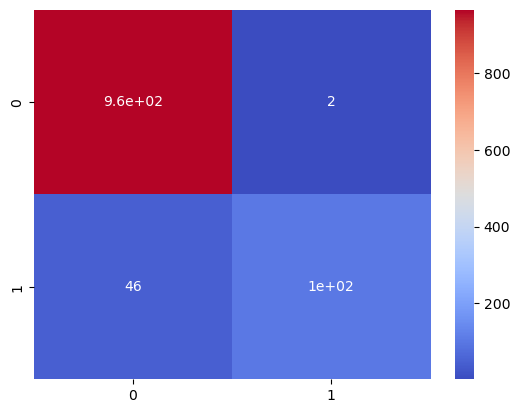

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')

In [11]:
def predict_spam(message):
    prediction = model.predict([message])[0]
    label = 'Spam' if prediction == 1 else 'Ham'
    return label

In [14]:
predict_spam("Congratulations! You've won a free iPhone. Click here to claim.")

'Spam'